<a href="https://colab.research.google.com/github/gyanbatch1/AIML/blob/master/NY_JOBS_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Code for Step 1
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
listed = drive.ListFile({'q': "title contains 'nyc_job.zip' and '1eJpQaJ8pwwqpCgdA6spl3dCANpB5MUYV' in parents"}).GetList()

for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title nyc_job.zip, id 1G2h2yFvG5vPvjwMuFpiUZwbMn11HxcMZ


In [0]:
train_downloaded = drive.CreateFile({'id': '1G2h2yFvG5vPvjwMuFpiUZwbMn11HxcMZ'})
train_downloaded.GetContentFile('nyc_job.zip')

In [0]:
import zipfile
import pandas as pd
import numpy as np
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
with zipfile.ZipFile("nyc_job.zip") as zip_ref:
  zip_ref.extractall()

In [0]:
#Define the colors
p = "YlGnBu"
p2 = "YlGn"
p3 = "Greys"

In [0]:
jobs = pd.read_csv("nyc-jobs.csv")
jobs.head(3)

In [0]:
jobs.info()

Data cleaning & Feature engineering

In [0]:
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color='white',
                     width=1024, height=720).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
def parse_categories(x):
    l = x.replace('&', ',').split(',')
    print(l)
    l = [x.strip().rstrip(',') for x in l]
    print(l)
    key_categories.extend(l)

def parse_keywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)
    
def preferred_skills(x):
    kwl = []
    jobs[jobs.job_category==x].preferred_skills.dropna().apply(parse_keywords, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:20]

In [0]:
jobs.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [0]:
#Drop the Recuitment Contact and Post Until Columns
jobs.drop(['Recruitment Contact', 'Post Until'], axis=1, inplace=True)

In [0]:
#Define the Column names
jobs.columns = ['id', 'agency', 'posting_type', 'number_of_positions', 'business_title', 'civil_service_title', 'title_code_number', 'level', 'job_category', 'full-time/part-time', 'salary_range_low', 'salary_range_high', 'salary_frequency', 'work_location', 'work_unit', 'job_description', 'minimum_requirements', 'preferred_skills', 'additional_info', 'to_apply', 'shift', 'work_location_1', 'residency_requirement', 'posting_date', 'posting_updated', 'process_date' ]

In [0]:
#Verify the column names
jobs.columns

Index(['id', 'agency', 'posting_type', 'number_of_positions', 'business_title',
       'civil_service_title', 'title_code_number', 'level', 'job_category',
       'full-time/part-time', 'salary_range_low', 'salary_range_high',
       'salary_frequency', 'work_location', 'work_unit', 'job_description',
       'minimum_requirements', 'preferred_skills', 'additional_info',
       'to_apply', 'shift', 'work_location_1', 'residency_requirement',
       'posting_date', 'posting_updated', 'process_date'],
      dtype='object')

In [0]:
jobs['job_category'].unique()

In [0]:
jobs.job_category.value_counts()

Engineering, Architecture, & Planning                                                                                                                                                                                537
Technology, Data & Innovation                                                                                                                                                                                        320
Public Safety, Inspections, & Enforcement                                                                                                                                                                            236
Health                                                                                                                                                                                                               216
Legal Affairs                                                                                                                       

In [0]:
key_categories = []
jobs.job_category.dropna().apply(parse_categories)
key_categories = pd.Series(key_categories)
key_categories = key_categories[key_categories!='']
print(key_categories)
popular_categories = key_categories.value_counts().iloc[:25]
popular_categories

Streaming output truncated to the last 5000 lines.
['Technology', 'Data', 'Innovation']
['Administration ', ' Human Resources Constituent Services ', ' Community Programs Policy', ' Research ', ' Analysis']
['Administration', 'Human Resources Constituent Services', 'Community Programs Policy', 'Research', 'Analysis']
['Engineering', ' Architecture', ' ', ' Planning']
['Engineering', 'Architecture', '', 'Planning']
['Engineering', ' Architecture', ' ', ' Planning']
['Engineering', 'Architecture', '', 'Planning']
['Technology', ' Data ', ' Innovation']
['Technology', 'Data', 'Innovation']
['Technology', ' Data ', ' Innovation']
['Technology', 'Data', 'Innovation']
['Finance', ' Accounting', ' ', ' Procurement Policy', ' Research ', ' Analysis']
['Finance', 'Accounting', '', 'Procurement Policy', 'Research', 'Analysis']
['Finance', ' Accounting', ' ', ' Procurement Policy', ' Research ', ' Analysis']
['Finance', 'Accounting', '', 'Procurement Policy', 'Research', 'Analysis']
['Technology'

Architecture              771
Engineering               750
Planning                  540
Inspections               502
Enforcement               492
Research                  432
Data                      416
Innovation                383
Analysis                  377
Technology                340
Accounting                295
Administration            269
Constituent Services      240
Public Safety             239
Finance                   239
Health                    216
Maintenance               214
Building Operations       188
Procurement               184
Legal Affairs             182
Community Programs        161
Policy                    141
Human Resources           134
Planning Public Safety     98
Communications             70
dtype: int64

In [0]:
jobs['full-time/part-time'].value_counts()

F    2757
P     169
Name: full-time/part-time, dtype: int64

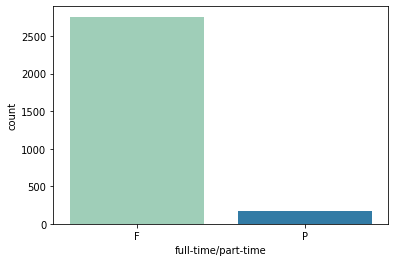

In [0]:
sns.countplot(x='full-time/part-time', data=jobs, palette=p)

In [0]:
jobs.salary_frequency.value_counts()

Annual    2862
Hourly     263
Daily       34
Name: salary_frequency, dtype: int64

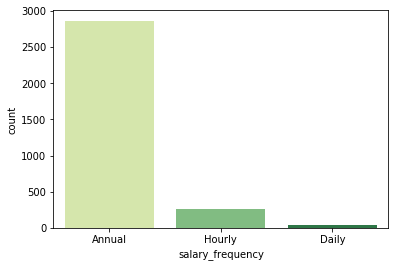

In [0]:
sns.countplot(x='salary_frequency',data=jobs,palette = p2)

Demand Job Categories

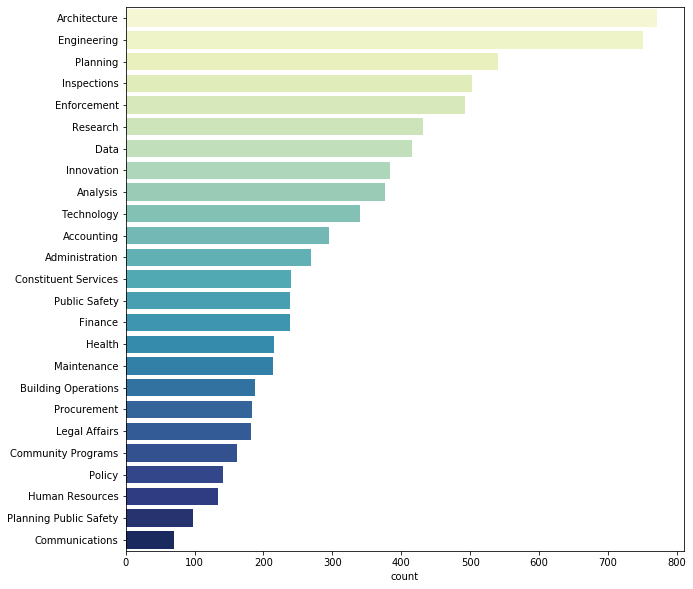

In [0]:
plt.figure(figsize=(10,10))
sns.countplot(y=key_categories, order=popular_categories.index, palette=p)

In [0]:
print(popular_categories.index.tolist())

['Architecture', 'Engineering', 'Planning', 'Inspections', 'Enforcement', 'Research', 'Data', 'Innovation', 'Analysis', 'Technology', 'Accounting', 'Administration', 'Constituent Services', 'Public Safety', 'Finance', 'Health', 'Maintenance', 'Building Operations', 'Procurement', 'Legal Affairs', 'Community Programs', 'Policy', 'Human Resources', 'Planning Public Safety', 'Communications']


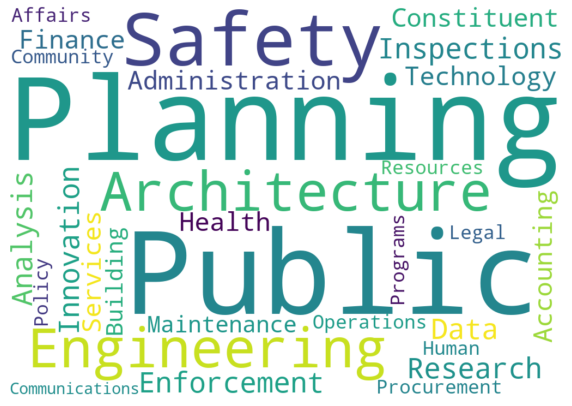

In [0]:
plt.figure(figsize=(10,8))
plot_wordcloud(' '.join(popular_categories.index.tolist()))

Popular Job Titles

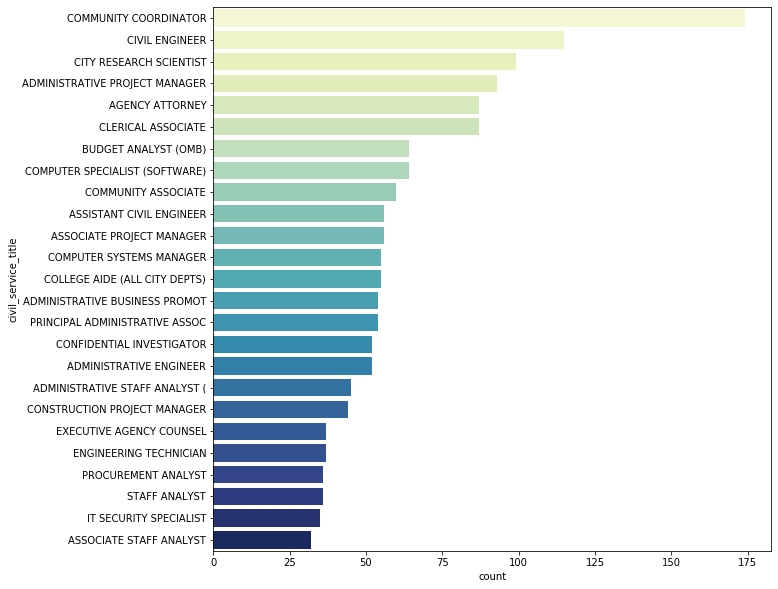

In [0]:
plt.figure(figsize=(10,10))
titles_freq = jobs.civil_service_title.value_counts()
popular_titles = titles_freq.iloc[:25]
sns.countplot(y="civil_service_title", data=jobs, order=popular_titles.index, palette=p)

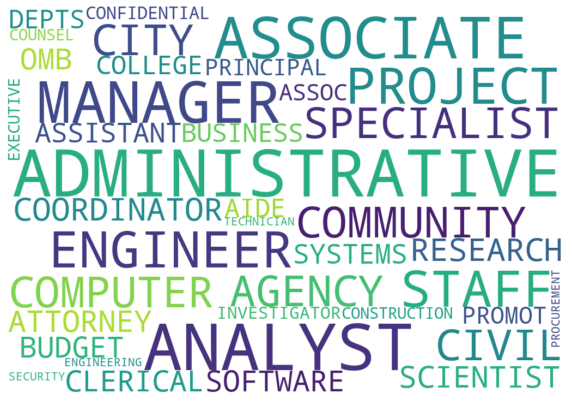

In [0]:
plt.figure(figsize=(10,8))
plot_wordcloud(' '.join(popular_titles.index.tolist()))

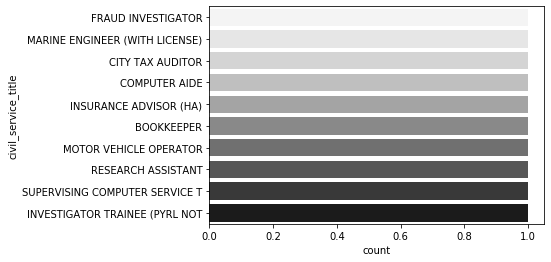

In [0]:
Least_popular = titles_freq.iloc[-10:]
sns.countplot(y="civil_service_title", data=jobs, order=Least_popular.index, palette=p3)

JObs With Highest Low Salary Range

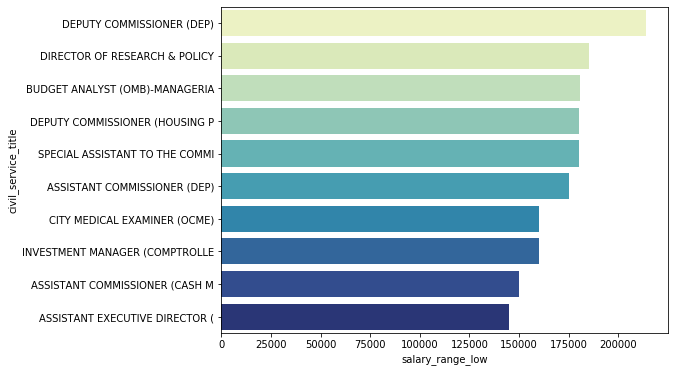

In [0]:
salary_table = jobs[['civil_service_title', 'salary_range_low', 'salary_range_high']]
jobs_highest_low_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_low'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_low', data=jobs_highest_low_range, palette=p)

JOb with Highest High Salary range

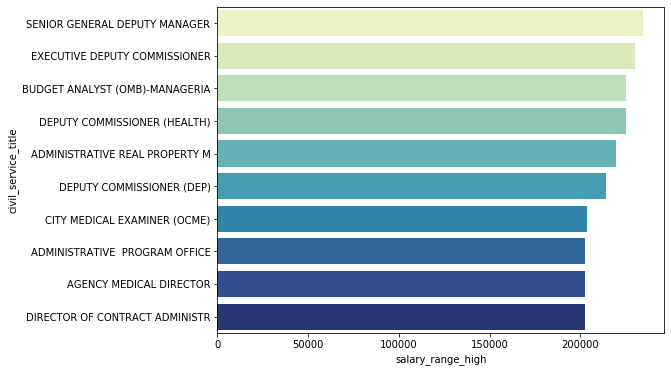

In [0]:
jobs_highest_high_range = pd.DataFrame(salary_table.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range, palette=p)

Highest paying Jobs on Hourly Basis

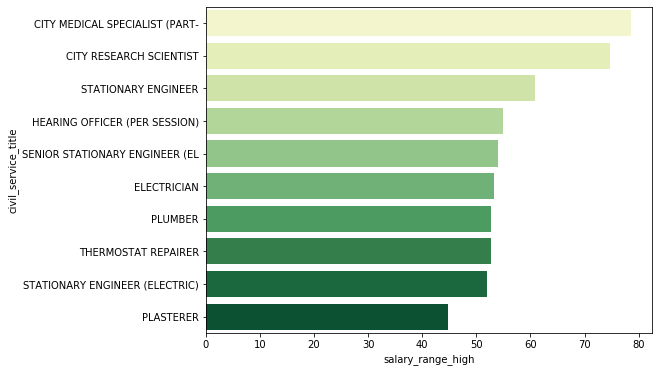

In [0]:
hourly_jobs = jobs[jobs.salary_frequency == 'Hourly']
jobs_highest_high_range_hourly = pd.DataFrame(hourly_jobs.groupby(['civil_service_title'])['salary_range_high'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='salary_range_high', data=jobs_highest_high_range_hourly, palette=p2)

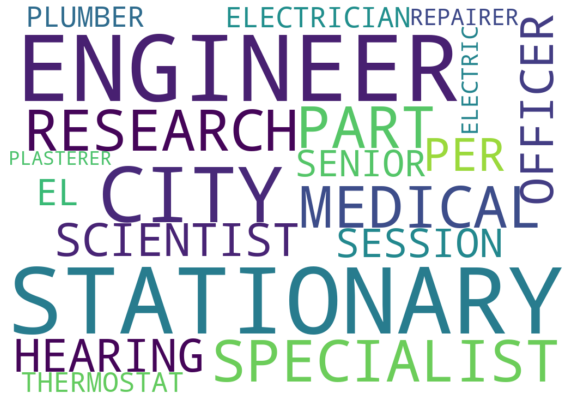

In [0]:
plt.figure(figsize=(10,8))
plot_wordcloud(' '.join(jobs_highest_high_range_hourly['civil_service_title'].tolist()))

Hourly Job Salary DIstribution

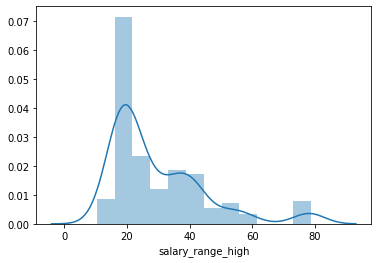

In [0]:
sns.distplot(hourly_jobs.salary_range_high)

Popular Work Units

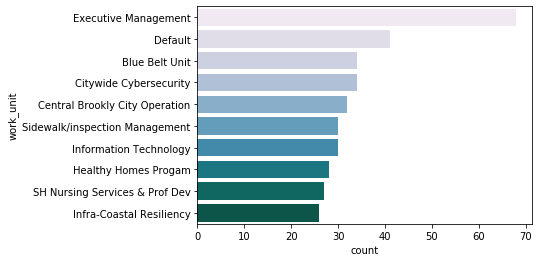

In [0]:
popular_divisions = jobs.work_unit.value_counts().iloc[:10]
sns.countplot(y='work_unit', data=jobs, order=popular_divisions.index, palette='PuBuGn')

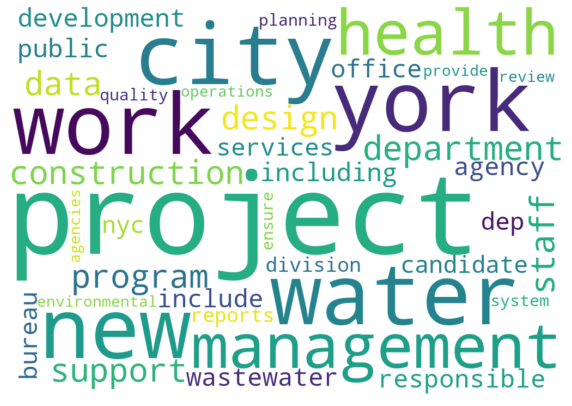

In [0]:
job_description_keywords = []
jobs.job_description.apply(parse_keywords, l=job_description_keywords)
plt.figure(figsize=(10, 8))
counter = Counter(job_description_keywords)
common = [x[0] for x in counter.most_common(40)]
plot_wordcloud(' '.join(common))

Most Preferred Skill on Job Category

In [0]:
opular_categories = jobs.job_category.value_counts()[:5]
popular_categories

Engineering, Architecture, & Planning        537
Technology, Data & Innovation                320
Public Safety, Inspections, & Enforcement    236
Health                                       216
Legal Affairs                                182
Name: job_category, dtype: int64

Minimum Qualification

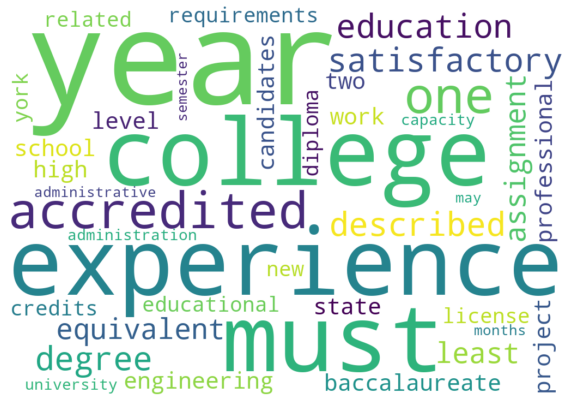

In [0]:
qualification_keywords = []
jobs.minimum_requirements.dropna().apply(parse_keywords, l=qualification_keywords)
plt.figure(figsize=(10, 8))
counter = Counter(qualification_keywords)
common = [x[0] for x in counter.most_common(40)]
plot_wordcloud(' '.join(common))